- Create a static machine learning model based on batch data. The dataset that is used is from top secret files obtained from our allies Ring Canada (RC) and the Cyber Threat Intelligence (CTI). The dataset provided to you has DNS traffic generated by exfiltrating various filetypes ranging from small to large sizes. ​

- The aim of the task is to implement a binary classifier aiming at predicting data exfiltration via DNS.​

In [71]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from numpy import nan
from numpy import inf

# Exploratory Data Analysis (EDA)

In [72]:
S_dataset= pd.read_csv("Static_dataset.csv")

In [73]:
S_dataset.shape

(268074, 16)

In [74]:
S_dataset.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [75]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [76]:
S_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [77]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
  print('\nClassification Report:\n')
  print(classification_report(y_actual, y_predict))
  print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_actual, y_predict)
  print(cm)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

# Data Cleaning

In [78]:
S_dataset['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [79]:
S_dataset['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

In [80]:
#replace the string to integer number 
S_dataset['longest_word'] = S_dataset['longest_word'].replace(r'(([a-z]+)|([A-Z]+))',2, regex=True)
S_dataset['longest_word'].fillna(2,inplace=True)
S_dataset['longest_word']=S_dataset['longest_word'] .astype('int') 
S_dataset['sld'] = S_dataset['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))',192, regex=True)
S_dataset['sld']=S_dataset['sld'] .astype('int') 
S_dataset=S_dataset.drop(labels = ["timestamp"], axis=1)

In [81]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  longest_word      268074 non-null  int64  
 11  sld               268074 non-null  int64  
 12  len               268074 non-null  int64  
 13  subdomain         268074 non-null  int64  
 14  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 30.7 MB


In [82]:
S_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,2.573815,212.637932,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,1.035046,2005.411184,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,0.000000,13.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,2.000000,192.000000,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,2.000000,192.000000,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,4.000000,224.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,9.000000,365838.000000,33.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


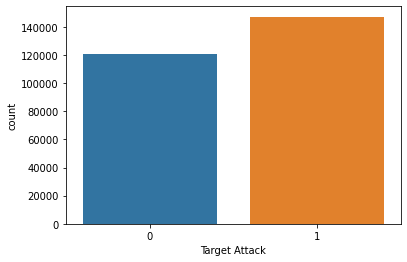

In [83]:
sns.countplot(S_dataset['Target Attack'])

In [84]:
S_dataset.skew()

FQDN_count           -1.101731
subdomain_length     -0.590480
upper                 5.988737
lower                 0.343449
numeric              -0.594384
entropy              -0.140156
special              -0.902972
labels               -0.903680
labels_max            3.979910
labels_average        5.087081
longest_word          2.269378
sld                 180.987411
len                   2.634801
subdomain            -1.176397
Target Attack        -0.197046
dtype: float64

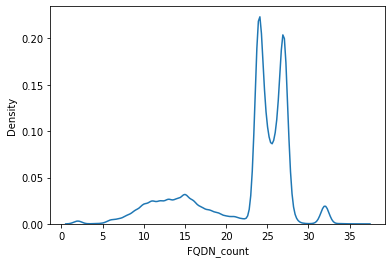

In [85]:
sns.kdeplot(data=S_dataset, x="FQDN_count")

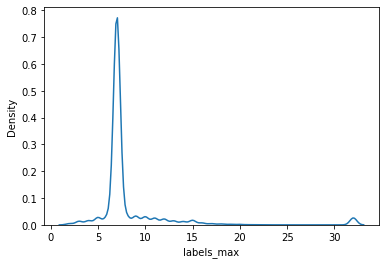

In [86]:
sns.kdeplot(data=S_dataset, x="labels_max")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


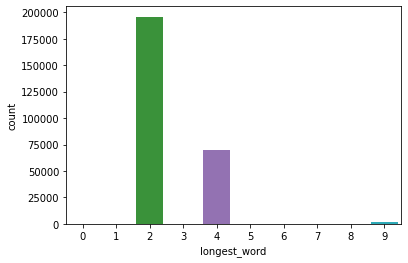

In [87]:
sns.countplot(S_dataset['longest_word'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


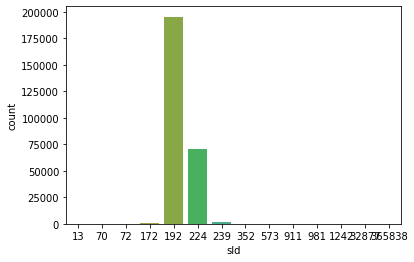

In [88]:
sns.countplot(S_dataset['sld'])

In [89]:
S_dataset.isnull().sum()

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

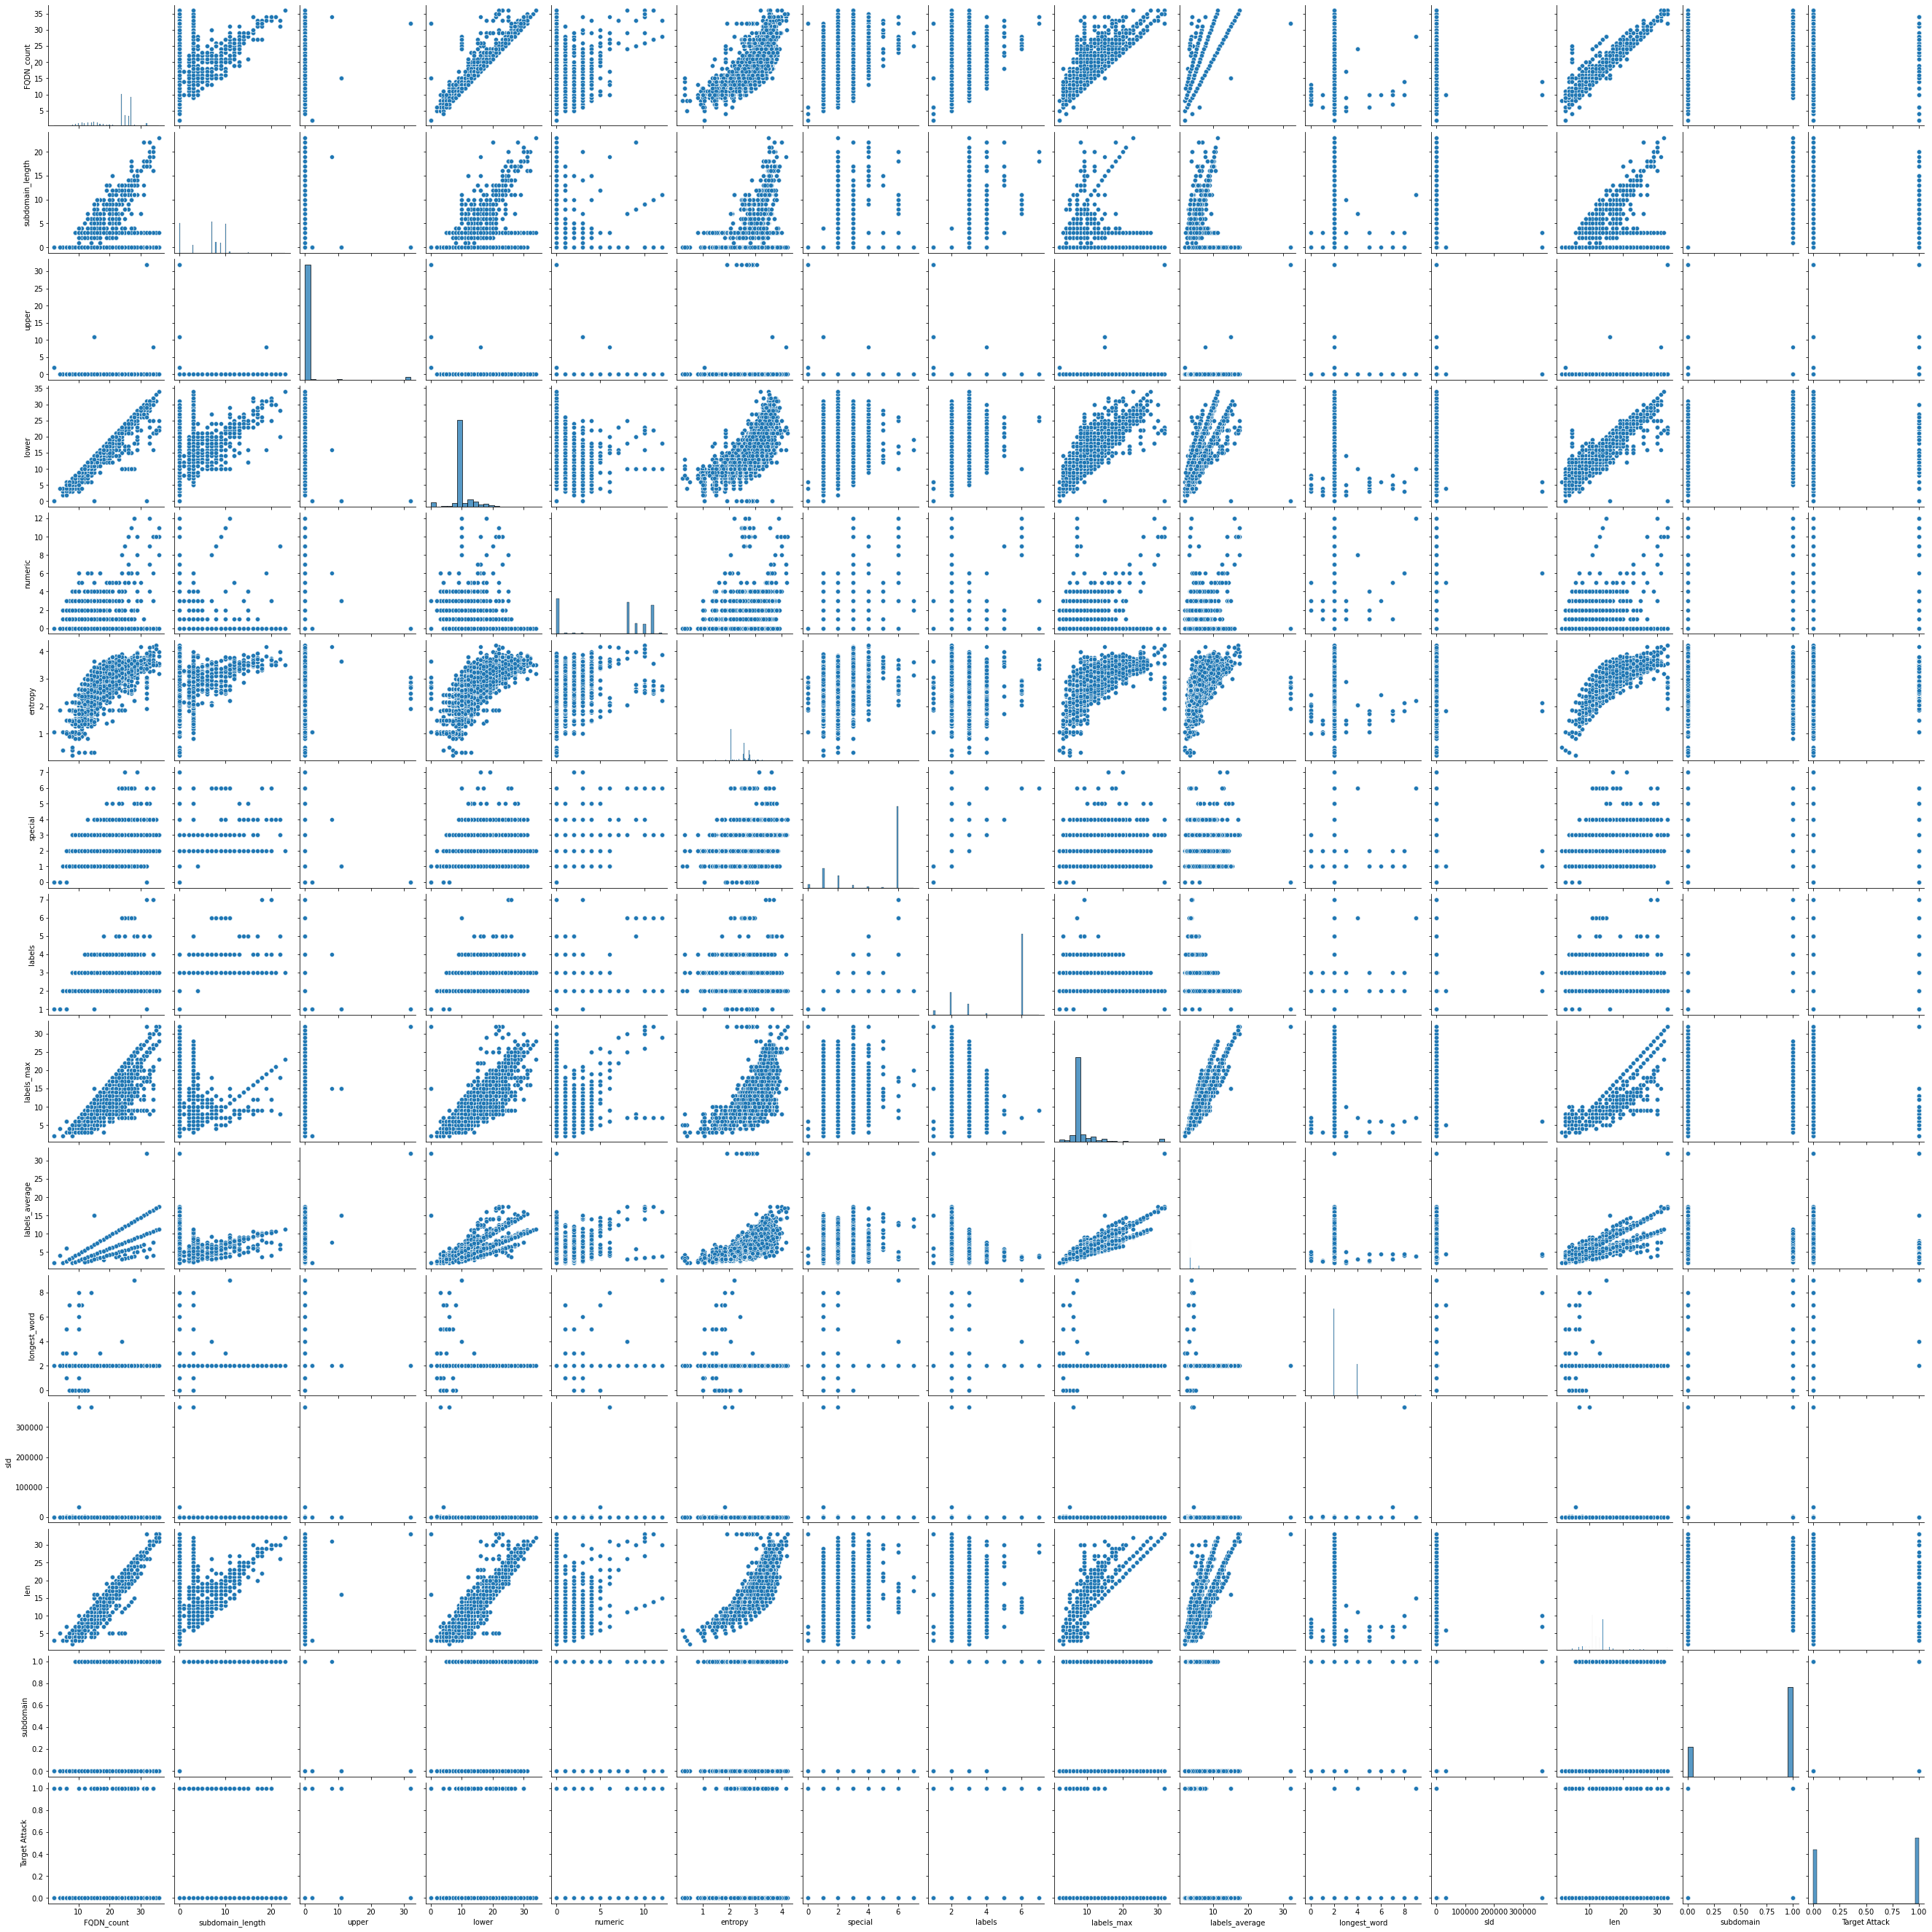

In [ ]:
# Basic correlogram
sns.pairplot(S_dataset)
plt.show()



# Baseline Model

In [90]:
X=S_dataset.drop(labels = ["Target Attack"], axis=1) 
y=S_dataset["Target Attack"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42,stratify=y)


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     30224
           1       0.76      0.99      0.86     36795

    accuracy                           0.82     67019
   macro avg       0.87      0.80      0.81     67019
weighted avg       0.86      0.82      0.81     67019


Confusion Matrix:

[[18649 11575]
 [  344 36451]]

Accuracy Score:

0.8221549112938122
\Confusion Matrix Display:



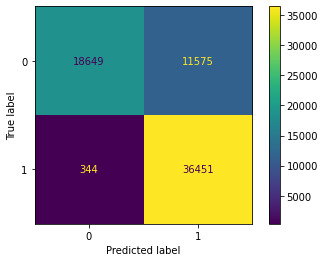

In [104]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
from sklearn.metrics import classification_report,accuracy_score
y_pred=clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
get_accuracies(y_test,y_pred)


# Feature Engineering

n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13


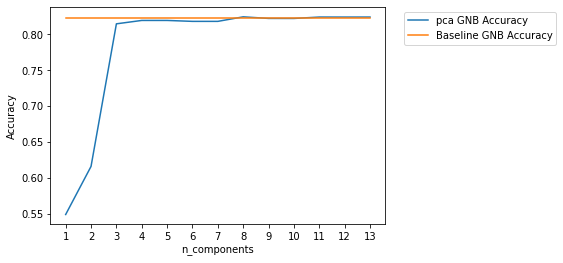

In [105]:
from sklearn.decomposition import PCA
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        print(f'n_components = {i}')
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, tuned_accs, clf_name, min_feats=0, operation='PCA', xlabel='n_components'):
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), tuned_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), [baseline_acc]*len(tuned_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.xticks(range(min_feats, min_feats+len(tuned_accs)))
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
clf = LogisticRegression(max_iter=1000)
clf_pca_accs = tune_pca(clf, X_train, y_train, X_test, y_test, 1, 14)
visualize_accs(acc, clf_pca_accs, "GNB", min_feats=1, operation='pca')

#Model Training and Evaluation​
## Logistic Regression



In [126]:
clf=LogisticRegression(max_iter=1000)


In [127]:
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("pca", PCA(n_components=13)), ("logistic", clf)])
pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=13)),
                ('logistic', LogisticRegression(max_iter=1000))])


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.61      0.76     30224
           1       0.76      1.00      0.86     36795

    accuracy                           0.82     67019
   macro avg       0.88      0.81      0.81     67019
weighted avg       0.86      0.82      0.82     67019


Confusion Matrix:

[[18583 11641]
 [  141 36654]]

Accuracy Score:

0.8241991077157224
\Confusion Matrix Display:



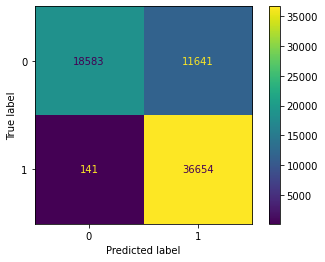

In [128]:
y_pred=pipe.predict(X_test)
acc=get_accuracies(y_test,y_pred)
